# 4 Теория приближения функций

## 4.4 $L_2(w)$ приближение функций

Основные функции в клетке ниже. Функция, которая принимает $f, w, \phi$ и возвращает коэффициенты $c$ --- функция ```approximate_coef```. Остальные --- для построения графиков и удобства.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter
from scipy.integrate import quad

def approximate_coef(f, w, phi):
    n = len(phi)

    # Матрица Грама
    G = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            G[i][j] = quad(lambda x : phi[i](x) * phi[j](x) * w(x), -1, 1)[0]
    
    b = np.array([quad(lambda x : phi[i](x) * f(x) * w(x), -1, 1)[0] for i in range(n)])
    c = np.linalg.solve(G, b)

    return c

def polynom_from_coef(phi, c):
    return lambda x : np.sum([c[i] * phi[i](x) for i in range(len(phi))])

def plot_approximation(f, af):
    x_range = np.linspace(-1, 1, num=100)
    fx = np.array([f(x) for x in x_range])
    afx = np.array([af(x) for x in x_range])

    gs = plt.GridSpec(1, 3)
    fig = plt.figure(figsize=(24, 5))
    plt.subplot(gs[0, 0])
    plt.title("Functions")
    plt.plot(x_range, fx, label="$f(x)$")
    plt.plot(x_range, afx, label="Approximate $f(x)$")
    plt.legend()
    
    plt.subplot(gs[0, 1])
    plt.title("Approximation error")
    plt.plot(x_range, fx - afx)

    plt.subplot(gs[0, 2])
    plt.title("Absolute approximation error")
    plt.plot(x_range, np.abs(fx - afx))

    plt.show()

def whole_thing(f, w, phi):
    c = approximate_coef(f, w, phi)
    af = polynom_from_coef(phi, c)
    plot_approximation(f, af)

Для тестирования заведем также методы, возвращающие простые полиномиальный и тригонометрические базисы.

In [16]:
def get_polynomial_phi(max_degree):
    phi = []
    for i in range(max_degree + 1):
        phi.append((lambda i : (lambda x : x ** i))(i))
    return phi

def get_trig_phi(max_degree):
    phi = [lambda x : 1]
    for i in range(1, max_degree + 1):
        phi.append((lambda i : (lambda x : np.cos(i * x)))(i))
        phi.append((lambda i : (lambda x : np.sin(i * x)))(i))
    return phi

Протестируем для $w \equiv 1$ и базиса многочленов степени не выше 2. Приближать будем $\sin(x)$.

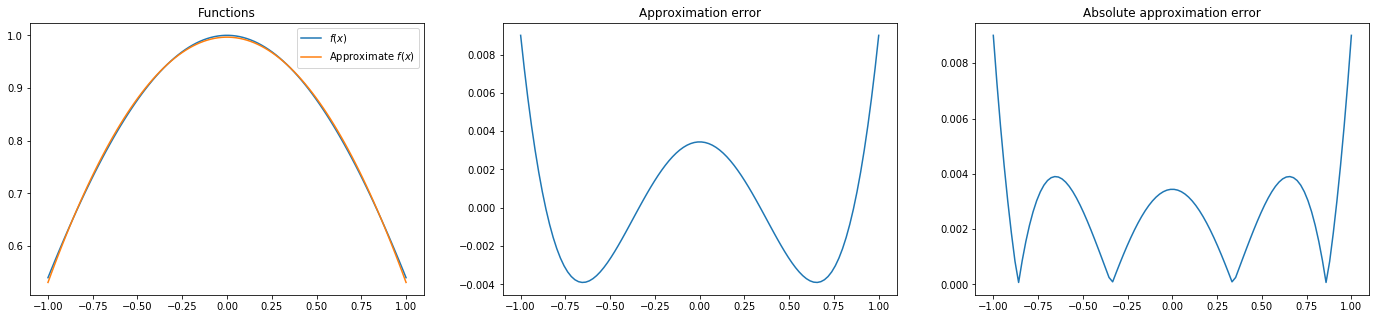

In [17]:
whole_thing(np.cos, lambda x : 1, get_polynomial_phi(2))

И наоборот --- для тригонометрического базиса размера 3 приблизим многочлен $x^2 - 3x + 2$.

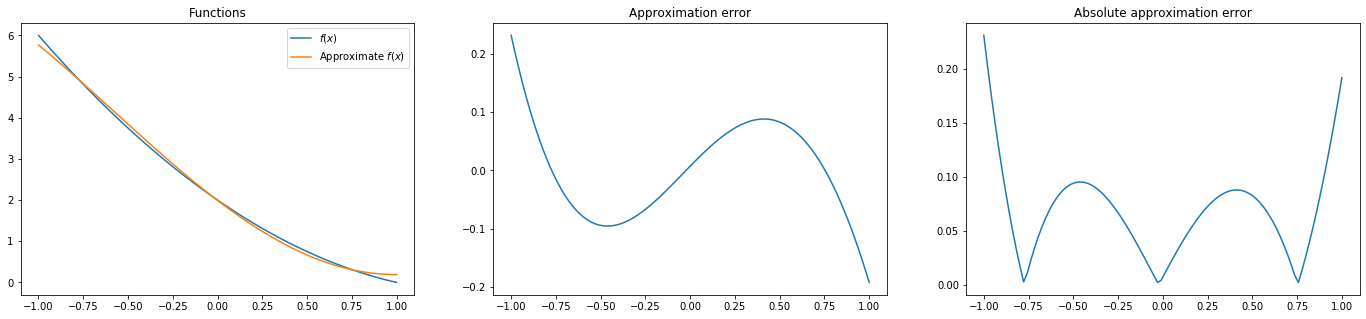

In [18]:
whole_thing(lambda x : x ** 2 - 3 * x + 2, lambda x : 1, get_trig_phi(1))

Сменим весовую функцию, увеличив вес для положительный $x$.

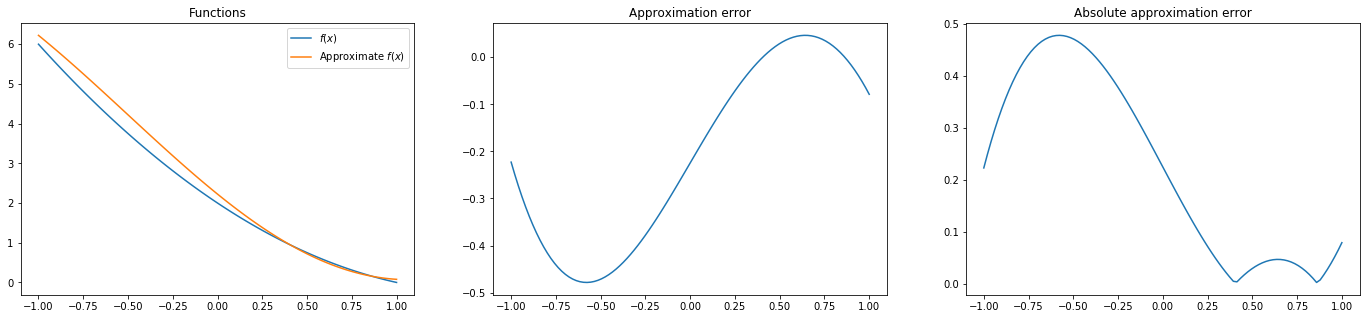

In [19]:
whole_thing(lambda x : x ** 2 - 3 * x + 2, lambda x : x / 10 if x < 0 else 20 * x, get_trig_phi(1))

Теперь мы заметно лучше приближаем функцию для $x > 0$, но похуже $x < 0$. Это хорошо видно на третьем графике с абсолютной ошбикой.

Наконец, увеличим размер того же тригонометрического базиса до 7 для той же весовой функции.

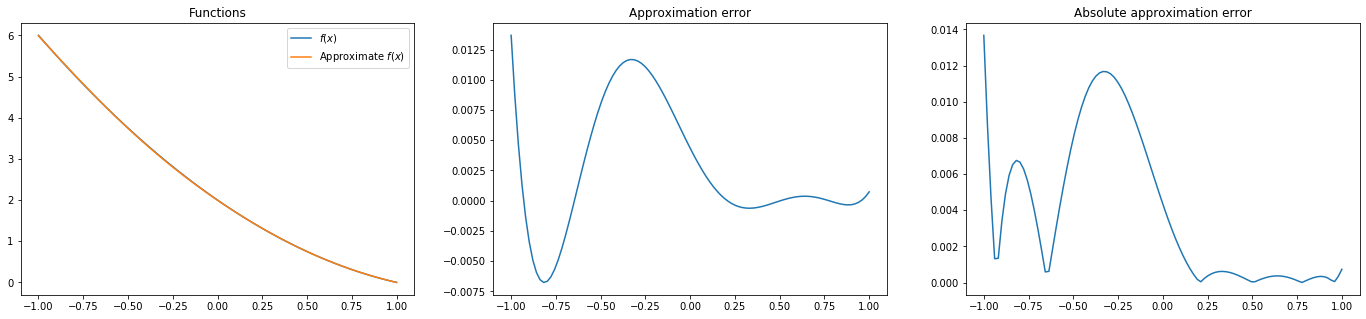

In [20]:
whole_thing(lambda x : x ** 2 - 3 * x + 2, lambda x : x / 10 if x < 0 else 20 * x, get_trig_phi(3))

Как и ожидалось, качество приближения намного лучше.